# Strain-Gage Low Noise Signal Conditioning

<img src="images/architecture.png" width="600">

<img src="images/Phase1Specs.png" width="600">

*Reference:* <br>
http://www.resistorguide.com/resistor-values/ <br>
https://www.ni.com/en-us/innovations/white-papers/07/measuring-strain-with-strain-gages.html <br>
https://www.analog.com/media/en/training-seminars/tutorials/MT-049.pdf <br>
https://learning.oreilly.com/library/view/operational-amplifier-noise/9780750685252/xhtml/CHP009.html#CHP009tit1 <br>
https://www.analog.com/en/products/amplifiers/operational-amplifiers.html <br>
https://www.analog.com/en/products/amplifiers/adc-drivers.html <br>
https://www.analog.com/en/parametricsearch/11091#/p2839=2|5&p4502=1M|4G&sort=4502,asc



#### Step 3 : Be sure to include the noise from the strain gage resistance.You should model the strain gage as a Thevenin equivalent circuit.

<img src="images/StrainGage.png" width="500">

$T=25C = 298 K$ <br>
$k = 1.381 \cdot 10^{−23}$ <br>
$kT = 4.1145 \cdot 10^{-21}$ <br>
$R = R_1 = R_2 = R_3 = R_4 = 1000 \Omega $

$\begin{eqnarray}
&& R_{eq} &=& (R_1 \parallel R_2) + (R_3 \parallel (R_4 + \Delta R))  \\[0.5em]
&& R_{eq}\Bigg|_{\Delta R=0} &=& (\frac{R}{2}) + (\frac{R}{2}) = R \\[0.5em]
&& k &=& 1.381 \cdot 10^{−23} \text{Joule/ Kelvin} \\[0.5em]
&& R_{eq} &=& \frac{R}{2} = 500 \Omega \\[0.5em]
&& e_n^2 &=& 4kTR_{eq}\Bigg|_{T=25C} \\[0.5em]
&& &=& 4 \cdot (4.1145e-21) \cdot (1000) \\[0.5em]
&& &=& 1.6458 \cdot 10^{-17} \frac{V^2}{\text{Hz}} \\[0.5em]
\end{eqnarray}$

<hr>

$\begin{eqnarray}
&& R_{eq} &=& \frac{R}{2} = 500 \Omega \\[0.5em]
&& e_{n_R}^2 &=& 4kTR_{eq}\Bigg|_{T=25C} \\[0.5em]
&& e_{n,\text{gage}}^2 &=& (i_{nn} R_{eq})^2 + e_{n_R}^2 + 
(i_{np} R_{eq})^2 + e_{n_R}^2 \\[0.5em]
&& e_{n,\text{gage}}^2 &=& 2(i_{n} R_{eq})^2 + 2e_{n_R}^2 
\frac{V^2}{\text{Hz}}\\[0.5em]
\end{eqnarray}$

#### Step 1 : Determine the input-referred voltage noise density required to meet the specifications.

$\begin{eqnarray}
&& \text{SNR} &=& 20\log\frac{v_{s(rms)}}{v_{n(rms)}} \rightarrow
20\log\frac{7.07\text{mV}}{v_{n(rms)}} \geq 77\text{dB} \\[0.5em]
&& v_{n,in(rms)} &\leq& 1 \mu V \\[0.5em]
\end{eqnarray}$

<hr>

$\begin{eqnarray}
&& v_{n,in(\text{rms})} &=& \sqrt{v_{n,in}^2 \cdot 5\text{KHz}} \leq 1 \mu V \\[0.5em]
&& && v_{n,in} \leq \frac{1 \mu V}{\sqrt{5\text{KHz}}} 
\approx 1.41\cdot 10^{-8} \frac{V}{\sqrt{\text{Hz}}}
\end{eqnarray}$

#### Step 2 : Perform noise analysis of the instrumentation amplifier and determine the relative impact of all noise sources on the input-referred noise.

**Difference Amp Inverting**

$\begin{eqnarray}
&& e_{n,out}^2 &=& (\frac{R_2}{R_1})^2 4kTR_1 + 4kTR_2 + (1+\frac{R_2}{R_1})^2 e_n^2 + (i_n R_2)^2 \\[0.5em]
&& e_{n,out}^2 &=& 4kTR_1 + 4kTR_2 + 4 e_n^2 + (i_n R_2)^2 \\[0.5em]
&& \\[0.5em]
&& e_{n,out} &=& \sqrt{(\frac{R_2}{R_1})^2 4kTR_1 + 4kTR_2 + 
(1+\frac{R_2}{R_1})^2 e_n^2 + (i_n R_2)^2} \\[0.5em]
\end{eqnarray}$

**Gain Stage**

$\begin{eqnarray}
&& e_{n,out}^2 &=& 2[(\frac{R_f}{R_G})^2 4kTR_G + 4kTR_f ] \\[0.5em]
&& e_{n,out}^2 &=& 2[(49.9)^2 4kTR_G + 4kTR_f] \\[0.5em]
\end{eqnarray}$

**Difference Amp Non-
Inverting**

$\begin{eqnarray}
&& e_{n,out}^2 &=& (1+\frac{R_2}{R_1})^2 4kTR_2 + 
(1+\frac{R_2}{R_1})^2 (\frac{R_2}{R_1+R_2})^2 4kTR_1  \\[0.5em]
&& e_{n,out}^2 &=& (4) 4kTR_2 + 4kTR_1  \\[0.5em]
\end{eqnarray}$

#### Step X: Use the first stage to realize the required gain. This will minimize the impact of U3’s noise, as well as that of R1and R2.

$\frac{2V_{p-p}}{20mV_{p-p}} = 100 \frac{V}{V} = 40$dB of gain. <br>
<br>
Choose E192 series resistors with 0.1%. I wanted $R_F$ to less than 50K.

$\begin{eqnarray} 
&& \frac{V_{out_1}}{V_{in}} &=& 1+2\frac{R_F}{R_G} = 100 \\[0.5em]
&& && \frac{R_F}{R_G} = 49.5 \\[0.5em]
&& && R_G = 1000, R_F = 49900 \\[0.5em]
\\[0.5em]
&& \frac{V_{out_2}}{V_{out_1}} &=& \frac{R_2}{R_1} = 1 = 0 \text{ dB} \\[0.5em]
&& && R_1 = 100K, R_2 = 100K \\[0.5em]
\\[0.5em]
&& \frac{V_{out_1}}{V_{in}} \frac{V_{out_2}}{V_{out_1}} &=& 
(1+2\frac{R_F}{R_G}) \cdot (\frac{R_2}{R_1}) \\[0.5em]
&& &=& (100.8) \cdot (1) \\[0.5em]
&& &=& 40.07 \text{ dB} \\[0.5em]
\end{eqnarray}$

#### Step X: Select  component  values  that  allow  you  to  achieve  the  noise  target,  with  resistor tolerances that make it possible to meet the CMRR specification.

$\begin{eqnarray}
&& \text{CMMR}_1 &=& 1+\frac{R_{fp}+R_{fm}}{R_G} = 40.07 \text{ dB} \\[0.5em]
&& \text{CMMR}_2 &=& \frac{A_{vd2}+1}{4 \epsilon} = \frac{2}{4(0.001)}
= 53.98 \text{ dB} \\[0.5em]
&& \text{CMMR}_1+\text{CMMR}_2 &=& 94.05 \text{ dB}
\end{eqnarray}$

<hr>

<img src="images/ADA4528.png" width="800">


|   |   |   |
|----------:|------|----|
|$V(vp-)$   | 2.5  | V  |
|$V(vm-)$   | 2.5  | V  |
|$V(vop)$   | 2.5  | V  |
|$V(vom)$   | 2.5  | V  |
|$V(in-)$   | 2.49999  | V  |
|$V(in+)$   | 2.49999  | V  |
|$V(vout)$  | 2.49998  | V  |
|$I(Rf_0)$   | -8.51778e-011  | A  |
|$I(Rf_1)$   | -8.51778e-011  | A  |
|$I(Rg)$     | 1.06581e-017   | A  |
|$I(R1_0)$   | -1.87986e-011  | A  |
|$I(R1_1)$   | 2.34496e-011   | A  |
|$I(R2_0)$   | -1.03976e-010  | A  |
|$I(R2_1)$   | 6.17282e-011   | A  |


|   |   |   |
|----------:|------|----|
|$Req$   | 500   | $\Omega$  |
|$R_G$   | 10K   | $\Omega$  |
|$R_F$   | 49.9K | $\Omega$  |
|$R_1$   | 100K  | $\Omega$  |
|$R_2$   | 100K  | $\Omega$  |

In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def read_ltspice(file_name,ftype='trans',units='db'):
    cols = []
    arrs = []
    with open(file_name, 'r',encoding='utf-8') as data:
        for i,line in enumerate(data):
            if i==0:
                cols = line.split()
                arrs = [[] for _ in cols]
                continue
            parts = line.split()
            for j,part in enumerate(parts):
                arrs[j].append(part)
    df = pd.DataFrame(arrs,dtype='float64')
    df = df.T
    df.columns = cols
    if ftype=='trans':
        return df
    elif ftype=='ac':
        if units=='db':
            for col in cols:
                if df[col].str.contains(',').all():
                    df[f'Mag_{col}'] = df[col].apply(lambda x: x.split(',')[0])
                    df[f'Mag_{col}'] = df[f'Mag_{col}'].apply(lambda x: x[1:-2])
                    df[f'Mag_{col}'] = df[f'Mag_{col}'].astype('float64')
                    df[f'Phase_{col}'] = df[col].apply(lambda x: x.split(',')[1])
                    df[f'Phase_{col}'] = df[f'Phase_{col}'].apply(lambda x: x[0:-2])
                    df[f'Phase_{col}'] = df[f'Phase_{col}'].astype('float64')
        if units=='cartesian':
            for col in cols:
                if df[col].str.contains(',').all():
                    df[f'Re_{col}'] = df[col].apply(lambda x: x.split(',')[0])
                    df[f'Re_{col}'] = df[f'Re_{col}'].astype('float64')
                    df[f'Im_{col}'] = df[col].apply(lambda x: x.split(',')[1])
                    df[f'Im_{col}'] = df[f'Im_{col}'].astype('float64')
        df['Freq.'] = df['Freq.'].astype('float64')
        return df
    else:
        print('invalid ftype')

In [3]:
filepath = 'data/ADA4528_noise.txt'
df = pd.read_csv(filepath)
#df = df[df['frequency']<5000]
mag = df['V(onoise)']
freq = df['frequency']

In [4]:
#Find 1KHz Magnitude
x0 = np.where(freq<=1000)[0][-1]
mag1K = mag.iloc[x0]
label = "{:.4f}".format(mag1K/100*1e8)
print(f"1KHz magnitude: {label}[e-8 V/sqrt(Hz)]")
x0

1KHz magnitude: 1.0329[e-8 V/sqrt(Hz)]


600

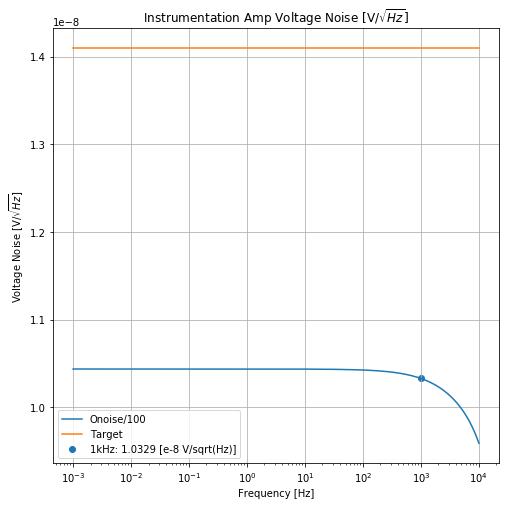

In [5]:
fig, ax = plt.subplots(1,figsize=(8,8))
#ax.semilogx(freq, mag, label='Output Noise')
ax.semilogx(freq, mag/100, label='Onoise/100')
ax.scatter(freq[x0],mag[x0]/100, label=f'1kHz: {label} [e-8 V/sqrt(Hz)]')
ax.semilogx(freq, 1.41e-8*np.ones(len(freq)), label='Target')
#ax.set_ylim(0,5e3)
#ax.set_ylim(0.9e-8,1.45e-8)
ax.ticklabel_format(style='sci', axis='y', scilimits=(-8,-8))
ax.set_title('Instrumentation Amp Voltage Noise [V/$\sqrt{Hz}$]')
ax.set_ylabel('Voltage Noise [V/$\sqrt{Hz}$]')
ax.set_xlabel('Frequency [Hz]')
ax.grid(True)
ax.legend()
plt.show();

In [6]:
filepath = 'data/ADA4528_ac.txt'
df = read_ltspice(filepath,'ac','db')
freq = df['Freq.']
mag = df['Mag_V(vout)/(V(vp)-V(vm))']
ang = df['Phase_V(vout)/(V(vp)-V(vm))']

In [7]:
#Find 1KHz Magnitude
x0 = np.where(freq<=5000)[0][-1]
mag5K = mag.iloc[x0]
label = "{:.4f}".format(mag5K)
print(f"5KHz magnitude: {label}[V/sqrt(Hz)]")
x0

5KHz magnitude: 40.0060[V/sqrt(Hz)]


669

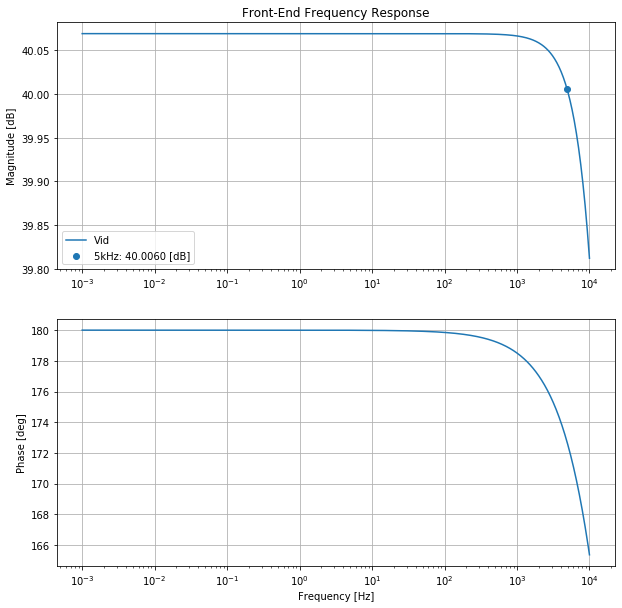

In [8]:
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].set_title('Front-End Frequency Response')
axs[0].semilogx(freq, mag, label='Vid')
axs[0].scatter(freq[x0],mag[x0], label=f'5kHz: {label} [dB]')
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()
axs[0].legend()
axs[1].semilogx(freq, ang, label='')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Phase [deg]')
axs[1].grid()
#axs[1].legend()
plt.show();

#### ADC Driver

$\begin{eqnarray}
&& f_{3dB} &=& \beta f_{T}\Bigg|_{\beta = 1} &=& f_{T}\\[0.5em]
&& t_{\text{settle}} &\geq& \ln{0.0001}  &\rightarrow& 5 \mu s \geq 6.9 \tau \\[0.5em]
&& \tau_{CL} &=& \frac{1}{2\pi f_{3dB}} &=& \frac{1}{2\pi f_{T}} \\[0.5em]
&& \frac{5 \mu s}{6.9} &\geq&  \frac{1}{2\pi f_{T}} \\[0.5em]
&& f_{T} &\geq& 219,634 \text{ Hz}
\end{eqnarray}$

<hr>

In [9]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
m,n,C1,C2,R1,R2,Q,tau,W0,Wc,Cn = sp.symbols('m,n,C1,C2,R1,R2,Q,tau,omega0,Wc,Cn')

In [11]:
# Low Pass System Stage 1
fc1 = fc2 = 5e3
systemLP = sp.Matrix([
    [W0 - 1/(tau*sp.sqrt(m*n))],
    [W0 - Cn*Wc],
    [Q - sp.sqrt(m*n)/(1+m)],
    [m - R1/R2],
    [n - C2/C1],
    [tau - R2*C1]
])
myVals = {
    W0:2*sp.pi*fc1,  # 5KHz
    Cn:0.5286,       # Table 
    Q:0.7845,        # Table 
    m:3.3,           # Chosen Ratio 
    C1:10e-9         # Chosen Value 
}
systemLP = systemLP.subs(myVals)
eq = sp.solve(systemLP)
eq, myVals

([{R2: 943.601719903925,
   C2: 3.44833037045454e-8,
   R1: 3113.88567568295,
   Wc: 59432.3241314755,
   n: 3.44833037045454,
   tau: 9.43601719903926e-6}],
 {omega0: 10000.0*pi, Cn: 0.5286, Q: 0.7845, m: 3.3, C1: 1e-08})

In [12]:
# Low Pass System Stage 2
fc1 = fc2 = 5e3
systemLP = sp.Matrix([
    [W0 - 1/(tau*sp.sqrt(m*n))],
    [W0 - Cn*Wc],
    [Q - sp.sqrt(m*n)/(1+m)],
    [m - R1/R2],
    [n - C2/C1],
    [tau - R2*C1]
])
myVals = {
    W0:2*sp.pi*fc2,  # 5KHz
    Cn:0.9932,       # Table 
    Q:3.5600,        # Table 
    m:1,             # Chosen Ratio 
    C1:10e-9         # Chosen Value 
}
systemLP = systemLP.subs(myVals)
eq = sp.solve(systemLP)
eq, myVals

([{R2: 447.064446887346,
   C2: 5.06944000000000e-7,
   R1: 447.064446887346,
   Wc: 31631.0174545891,
   n: 50.6944000000000,
   tau: 4.47064446887346e-6}],
 {omega0: 10000.0*pi, Cn: 0.9932, Q: 3.56, m: 1, C1: 1e-08})

In [13]:
# Low Pass
Q1 = 0.7845
cn1 = 0.5286 
C1 = 10e-9
C2 = 3.44833037045454e-8
R1 = 3113.88567568295
R2 = 943.601719903925

Q2 = 3.56
cn2 = 0.9932
C3 = 10e-9
C4 = 5.06944000000000e-7
R3 = 447.064446887346
R4 = 447.064446887346
 
w01 = 2*np.pi*fc1*cn1
w02 = 2*np.pi*fc2*cn2

a1 = 1
b1 = w01/Q1
c1 = w01**2
num1 = [c1]
den1 = [a1, b1, c1]

a2 = 1
b2 = w02/Q2
c2 = w02**2
num2 = [c2]
den2 = [a2, b2, c2]

stage1 = signal.TransferFunction(num1, den1)
stage2 = signal.TransferFunction(num2, den2)
cheby_4th = signal.TransferFunction(np.polymul(num1, num2), np.polymul(den1, den2))

f = np.logspace(0, 5, 10000)
w = 2*np.pi*f
w1, mag1, phase1 = stage1.bode(w=w)
w2, mag2, phase2 = stage2.bode(w=w)
w3, mag4, phase4 = cheby_4th.bode(w=w)

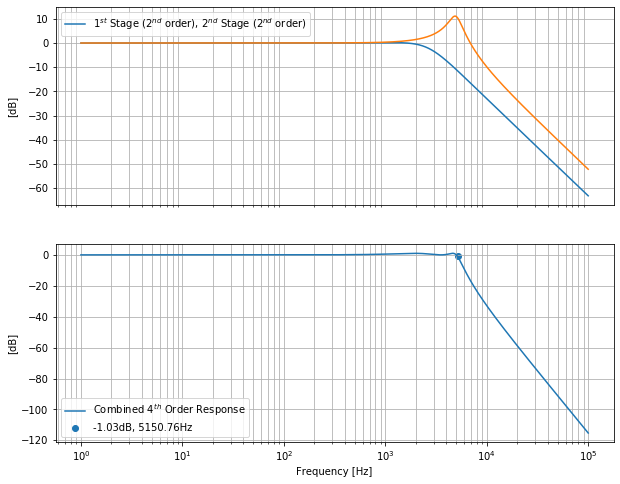

In [14]:
fig, ax = plt.subplots(2,figsize=(10,8))

x1 = 2000+np.where(mag4[2000:]<=-1)[0][0]
label1 = "{:.2f}dB, {:.2f}Hz".format(mag4[x1],f[x1])

ax[0].semilogx(f, mag1)
ax[0].semilogx(f, mag2)
ax[0].grid(which='both', axis='both')
ax[0].axes.xaxis.set_ticks([])
ax[0].axes.xaxis.set_ticklabels([])
ax[0].set_ylabel('[dB]')
ax[0].legend( [r'$1^{st}$ Stage ($2^{nd}$ order), $2^{nd}$ Stage ($2^{nd}$ order)'])

ax[1].semilogx(f,mag4,label=r'Combined $4^{th}$ Order Response')
ax[1].scatter(f[x1],mag4[x1],label=label1,color='tab:blue')
ax[1].grid(which='both', axis='both')
ax[1].set_ylabel('[dB]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend()

fig.align_ylabels(ax[:])
plt.show();

<hr>

In [15]:
m,n,C1,C2,R1,R2,Q,tau,W0,Wc,Cn = sp.symbols('m,n,C1,C2,R1,R2,Q,tau,omega0,Wc,Cn')

In [16]:
# Low Pass System Stage 1
fc1 = 5e3/1.12
systemLP = sp.Matrix([
    [W0 - 1/(tau*sp.sqrt(m*n))],
    [W0 - Cn*Wc],
    [Q - sp.sqrt(m*n)/(1+m)],
    [m - R1/R2],
    [n - C2/C1],
    [tau - R2*C1]
])
myVals = {
    W0:2*sp.pi*fc1,  # 5KHz
    Cn:1.0500,       # Table 
    Q:0.9565,        # Table 
    m:3.3,           # Chosen Ratio 
    C1:10e-9         # Chosen Value 
}
systemLP = systemLP.subs(myVals)
eq = sp.solve(systemLP)
eq, myVals

([{R2: 866.791652040131,
   C2: 5.12616900075757e-8,
   R1: 2860.41245173243,
   Wc: 26714.2232448112,
   n: 5.12616900075757,
   tau: 8.66791652040131e-6}],
 {omega0: 8928.57142857143*pi, Cn: 1.05, Q: 0.9565, m: 3.3, C1: 1e-08})

In [17]:
# Low Pass
Q1 = 0.9565
cn1 = 1.0500 
C1 = 10e-9
C2 = 5.12616900075757e-8
R1 = 2860.41245173243
R2 = 866.791652040131,

w01 = 2*np.pi*fc1*cn1
a1 = 1
b1 = w01/Q1
c1 = w01**2
num1 = [c1]
den1 = [a1, b1, c1]

stage1 = signal.TransferFunction(num1, den1)
f = np.logspace(1, 5, 10000)
w = 2*np.pi*f
w1, mag1, phase1 = stage1.bode(w=w)

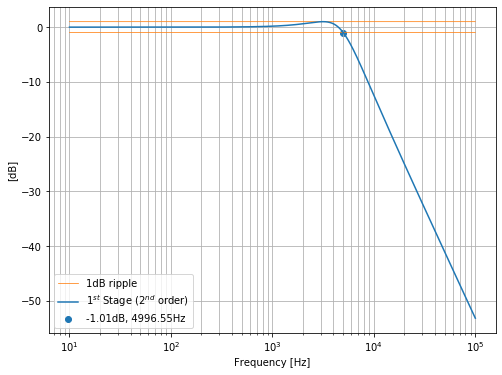

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

x1 = 2000+np.where(mag1[2000:]<=-1)[0][0]
label1 = "{:.2f}dB, {:.2f}Hz".format(mag1[x1],f[x1])

ax.semilogx(f, 1*np.ones(len(mag1)),color='tab:orange',linewidth=.75)
ax.semilogx(f,-1*np.ones(len(mag1)),color='tab:orange',linewidth=.75,label='1dB ripple')
ax.semilogx(f, mag1, label=r'$1^{st}$ Stage ($2^{nd}$ order)')
ax.scatter(f[x1],mag1[x1],label=label1,color='tab:blue')
ax.grid(which='both', axis='both')
ax.set_ylabel('[dB]')
ax.set_xlabel('Frequency [Hz]')
ax.legend()
plt.show();

In [19]:
m,n,C1,C2,R1,R2,Q,tau,W0,Wc,Cn = sp.symbols('m,n,C1,C2,R1,R2,Q,tau,omega0,Wc,Cn')

In [20]:
# High Pass System Stage 1
fc1 = 1
systemHP = sp.Matrix([
    [W0 - 1/(tau*sp.sqrt(m*n))],
    [W0 - Wc/Cn],
    [Q - sp.sqrt(m*n)/(1+n)],
    [m - R2/R1],
    [n - C1/C2],
    [tau - R2*C2]
])
myVals = {
    W0:2*sp.pi*fc1,    # 1Hz
    Cn:1.0500,       # Table 
    Q:0.9565,        # Table 
    n:3.3,           # Chosen Ratio 
    C1:3.3e-6        # Chosen Value 
}
systemHP = systemHP.subs(myVals)
eq = sp.solve(systemHP)
eq, myVals

([{C2: 1.00000000000000e-6,
   R1: 7548.72808308310,
   R2: 38696.0558946487,
   Wc: 6.59734457253857,
   m: 5.12616900075757,
   tau: 0.0386960558946487}],
 {omega0: 2*pi, Cn: 1.05, Q: 0.9565, n: 3.3, C1: 3.3e-06})

In [21]:
# High Pass
#f_ratio = 1.21763    # taken from Table 1 in MT-206 app note
#fc_hp = 1/f_ratio    # 1Hz HP filter

Q1 = 0.9565
cn1 = 1.0500 
C1 = 3.3e-6
C2 = 1e-6
R1 = 7548.72808308310
R2 = 38696.0558946487


w01 = 2*np.pi*fc1*cn1
a1 = 1
b1 = w01/Q1
c1 = w01**2
num3 = [1, 0, 0]
den3 = [a1, b1, c1]

stage1 = signal.TransferFunction(num3, den3)
f = np.logspace(-2, 3, 10000)
w = 2*np.pi*f
w1, mag1, phase1 = stage1.bode(w=w)

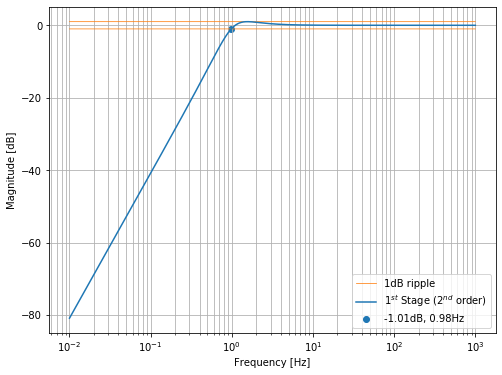

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

x0 = np.where(mag1<=-1)[0][-1]
label0 = "{:.2f}dB, {:.2f}Hz".format(mag1[x0],f[x0])

ax.semilogx(f, 1*np.ones(len(mag1)),color='tab:orange',linewidth=.75)
ax.semilogx(f,-1*np.ones(len(mag1)),color='tab:orange',linewidth=.75,label='1dB ripple')
ax.semilogx(f, mag1, label=r'$1^{st}$ Stage ($2^{nd}$ order)')
ax.scatter(f[x0],mag1[x0-1],label=label0,color='tab:blue')
ax.grid(which='both', axis='both')
ax.set_ylabel('Magnitude [dB]')
ax.set_xlabel('Frequency [Hz]')
ax.legend()

plt.show();

In [23]:
cheby_4th = signal.TransferFunction(
    np.polymul(num1, num3),
    np.polymul(den1, den3)
)
f = np.logspace(-1, 5, 10000)
w = 2*np.pi*f
w1, mag1, phase1 = cheby_4th.bode(w=w)

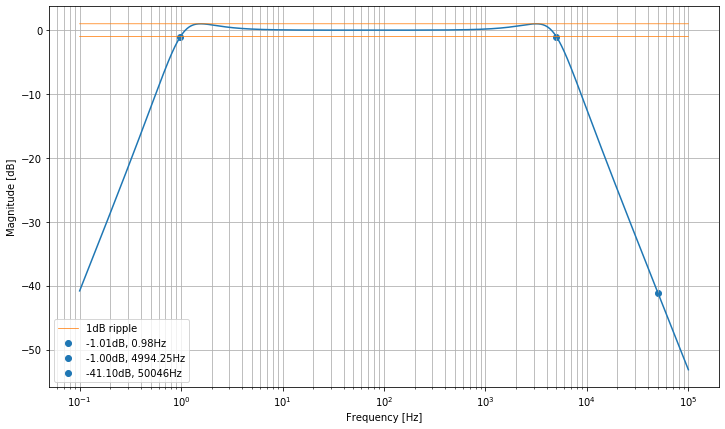

In [24]:
fig, ax = plt.subplots(figsize=(12,7))

x0 = np.where(mag1[0:2000]<=-1)[0][-1]
label0 = "{:.2f}dB, {:.2f}Hz".format(mag1[x0],f[x0])
x1 = 2000+np.where(mag1[2000:]<=-1)[0][0]
label1 = "{:.2f}dB, {:.2f}Hz".format(mag1[x1],f[x1])
x2 = np.where(f>=50000)[0][0]
label2 = "{:.2f}dB, {:.0f}Hz".format(mag1[x2],f[x2])

ax.semilogx(f, mag1)
ax.semilogx(f, 1*np.ones(len(mag1)),color='tab:orange',linewidth=.75)
ax.semilogx(f,-1*np.ones(len(mag1)),color='tab:orange',linewidth=.75,label='1dB ripple')
ax.scatter(f[x0],mag1[x0],label=label0,color='tab:blue')
ax.scatter(f[x1],mag1[x1],label=label1,color='tab:blue')
ax.scatter(f[x2],mag1[x2],label=label2,color='tab:blue')
ax.grid(which='both', axis='both')
ax.set_ylabel('Magnitude [dB]')
ax.set_xlabel('Frequency [Hz]')
ax.legend()
plt.show();